In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

os.chdir(r"D:\CK0731\v3")
import UnetModel
import UnetDataset

In [2]:
# Path
input_dir1_train = r'D:\CK0731\ATN_v3_train'
input_dir2_train = r'D:\CK0731\BDM_v3_train'
output_dir_train = r'D:\CK0731\PGM_v3_train'

input_dir1_val = r'D:\CK0731\ATN_v3_val'
input_dir2_val = r'D:\CK0731\BDM_v3_val'
output_dir_val = r'D:\CK0731\PGM_v3_val'

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

num_epochs = 20
learning_rate = 1e-3


cuda


In [3]:
train_dataset = UnetDataset.IsoDataset(input_dir1_train, input_dir2_train, output_dir_train)
val_dataset = UnetDataset.IsoDataset(input_dir1_val, input_dir2_val, output_dir_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

In [4]:
# Define the model, loss function, optimizer, and scheduler
model = UnetModel.UNetIso().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#use scheduler to reduce learning rate when loss is not decreasing
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

In [5]:
# Training loop
import time

Tloss = []
Vloss = []
LRhist = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    Tloss.append(epoch_loss)

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in val_loader:
            val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_targets).item() * val_inputs.size(0)

    val_loss /= len(val_loader.dataset)
    Vloss.append(val_loss)

    LRhist.append(optimizer.param_groups[0]['lr'])
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"learning rate: ")
    print(optimizer.param_groups[0]['lr'])
    print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
    

    # Adjust learning rate based on validation loss
    scheduler.step(val_loss)

print("Training complete.")

# Save weight
save_path = r"D:\CK0731\v3\UnetModel_0020.pth"

torch.save(model.state_dict(), save_path)

# Save loss
np.save(r"D:\CK0731\v3\Tloss.npy", Tloss)
np.save(r"D:\CK0731\v3\Vloss.npy", Vloss)
np.save(r"D:\CK0731\v3\LRhist.npy", LRhist)


Epoch 1/20, Loss: 3506.0041
Validation Loss: 404.0343
learning rate: 
0.001
2024-07-31 18:16:07
Epoch 2/20, Loss: 300.1277
Validation Loss: 359.5393
learning rate: 
0.001
2024-07-31 18:21:20
Epoch 3/20, Loss: 227.8119
Validation Loss: 362.0577
learning rate: 
0.001
2024-07-31 18:26:34
Epoch 4/20, Loss: 191.2320
Validation Loss: 369.1981
learning rate: 
0.001
2024-07-31 18:31:51
Epoch 5/20, Loss: 171.5917
Validation Loss: 405.9909
learning rate: 
0.001
2024-07-31 18:37:09
Epoch 6/20, Loss: 159.4130
Validation Loss: 366.1057
learning rate: 
0.001
2024-07-31 18:42:26
Epoch 7/20, Loss: 1313.5392
Validation Loss: 486.3194
learning rate: 
0.001
2024-07-31 18:47:37
Epoch 8/20, Loss: 469.1529
Validation Loss: 452.3917
learning rate: 
0.001
2024-07-31 18:52:49
Epoch 9/20, Loss: 432.5860
Validation Loss: 434.9991
learning rate: 
0.0001
2024-07-31 18:58:03
Epoch 10/20, Loss: 425.4815
Validation Loss: 437.2896
learning rate: 
0.0001
2024-07-31 19:03:15
Epoch 11/20, Loss: 419.3046
Validation Loss: 

In [6]:
model.eval()

UNetIso(
  (enc1): Sequential(
    (0): Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc5): Sequential(
    (0): Conv2d(512, 1024, kern

[[-147.5403   -159.74394  -159.7532   ... -110.29209  -109.203804
  -100.85637 ]
 [-170.58109  -157.22194  -157.19743  ... -109.33434  -106.71927
  -111.85279 ]
 [-166.06403  -154.35574  -150.05669  ... -110.89834  -108.48379
  -111.643616]
 ...
 [-155.67471  -156.1116   -155.66364  ... -156.79523  -160.83931
  -163.23625 ]
 [-159.77156  -160.06613  -159.58264  ... -154.85912  -159.82303
  -163.14989 ]
 [-168.73299  -159.47926  -160.44814  ... -167.64165  -167.99637
  -146.44882 ]]


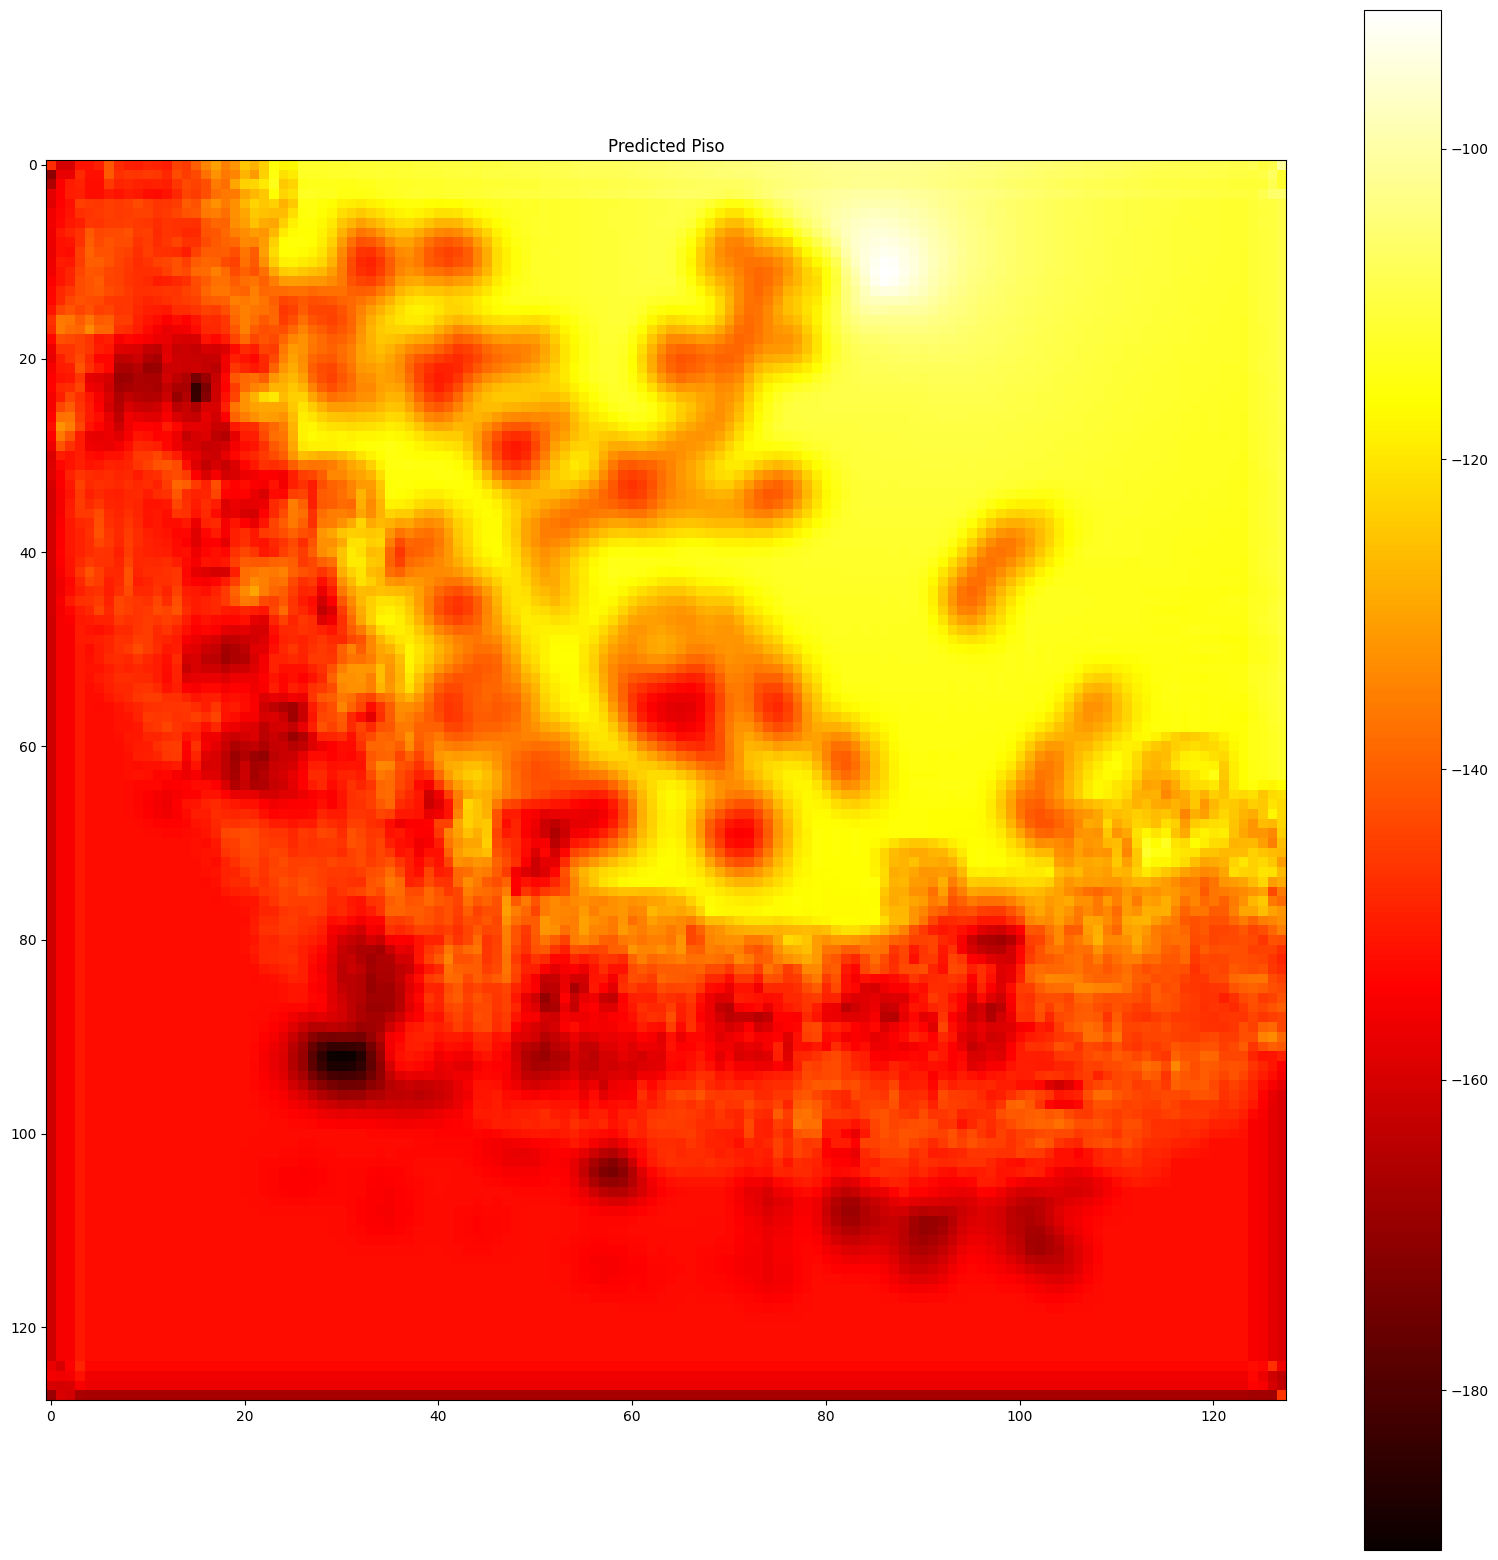

In [8]:
from matplotlib import pyplot as plt
x1 = np.load(r"D:\CK0731\ATN_v3_val\ATN1_6.npy")
x2 = np.load(r"D:\CK0731\BDM_v3_val\BDM1_6.npy")
input_image = np.stack([x1, x2], axis=-1)
input_image = torch.from_numpy(input_image).permute(2, 0, 1).unsqueeze(0).to(device)
with torch.no_grad():
    output_image = model(input_image)
output_image = output_image.squeeze().cpu().numpy()
plt.figure(figsize=(20,20))
plt.subplot()
plt.imshow(output_image, cmap='hot')
plt.title('Predicted Piso')
plt.colorbar()
print(output_image)

[[-160.       -160.       -160.       ...  -99.46229   -99.92577
  -100.15918 ]
 [-160.       -160.       -160.       ... -100.00712  -100.556305
  -101.41333 ]
 [-160.       -160.       -160.       ... -100.52408  -101.07149
   -99.80121 ]
 ...
 [-160.       -160.       -160.       ... -160.       -160.
  -160.      ]
 [-160.       -160.       -160.       ... -160.       -160.
  -160.      ]
 [-160.       -160.       -160.       ... -160.       -160.
  -160.      ]]


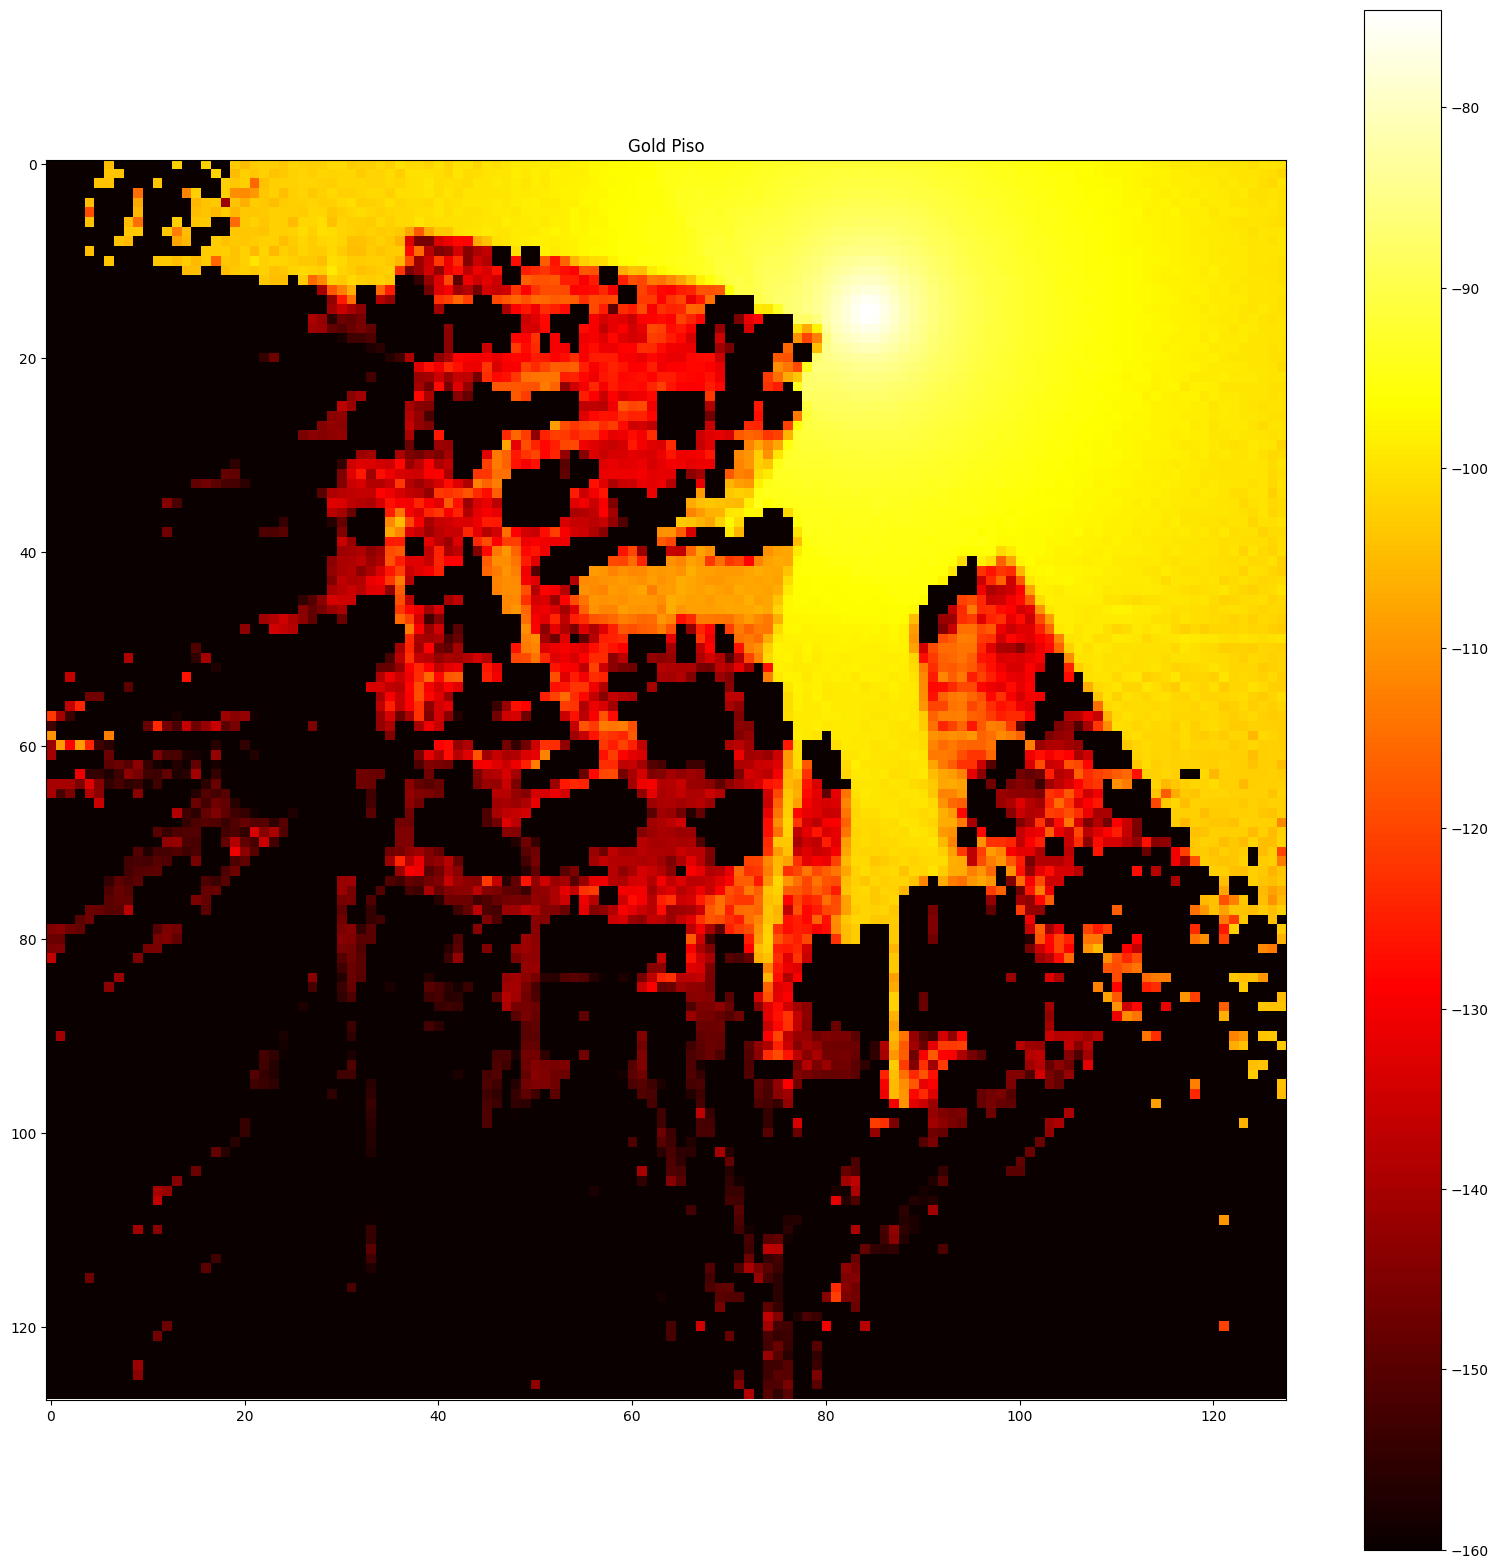

In [9]:
gold_image = np.load(r"D:\CK0731\PGM_v3_val\PGM1_6.npy").astype(np.float32)

plt.figure(figsize=(20,20))
plt.subplot()
plt.imshow(gold_image, cmap='hot')
plt.title('Gold Piso')
plt.colorbar()
print(gold_image)

[[ 12.459702     0.25605774   0.24679565 ... -10.829803    -9.27803
   -0.69718933]
 [-10.581085     2.778061     2.8025665  ...  -9.327225    -6.162964
  -10.439461  ]
 [ -6.064026     5.6442566    9.943314   ... -10.37426     -7.4123
  -11.842407  ]
 ...
 [  4.325287     3.8883972    4.3363647  ...   3.204773    -0.8393097
   -3.2362518 ]
 [  0.22843933  -0.06613159   0.4173584  ...   5.1408844    0.17697144
   -3.149887  ]
 [ -8.732986     0.5207367   -0.44813538 ...  -7.6416473   -7.9963684
   13.551178  ]]


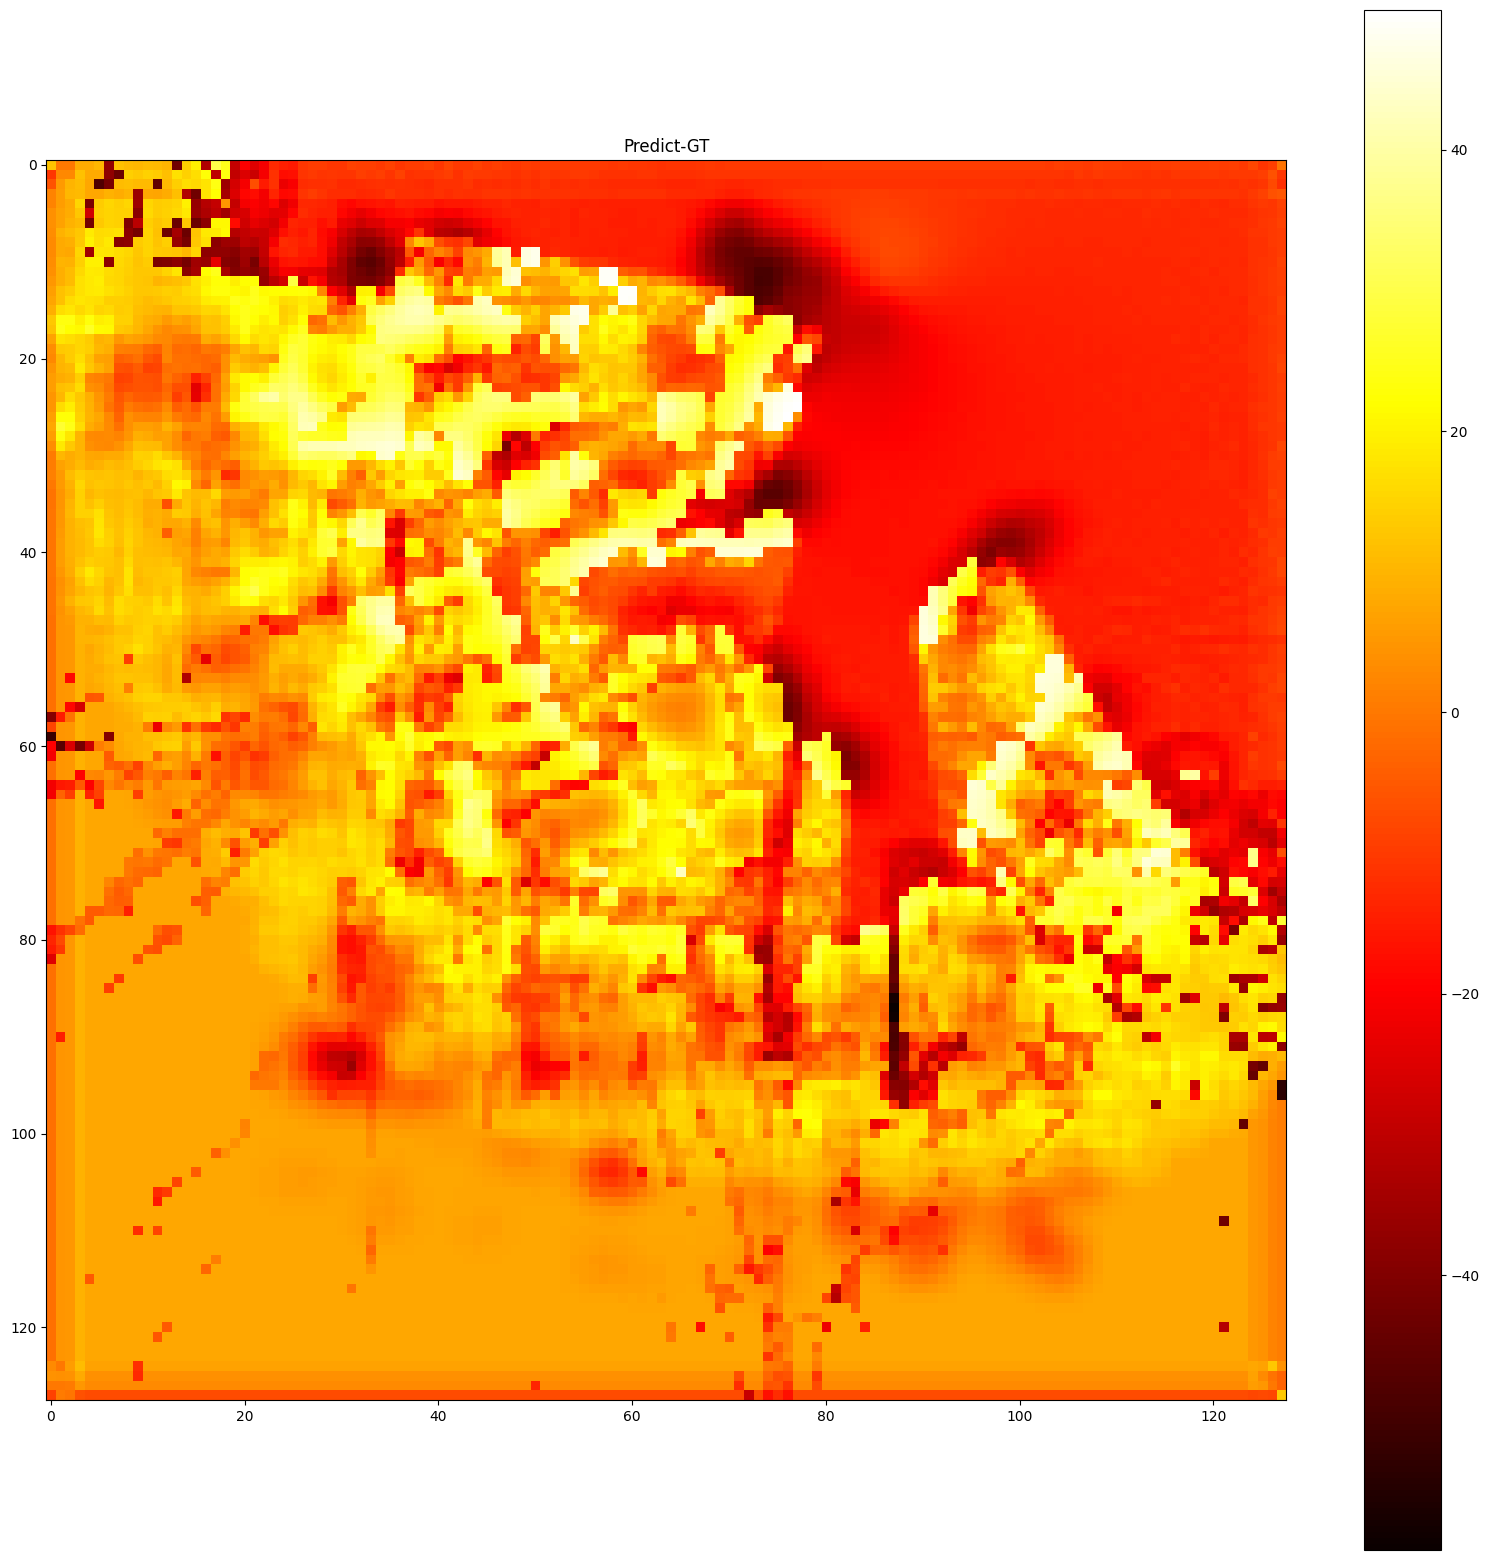

In [10]:
diff = output_image - gold_image
plt.figure(figsize=(20,20))
plt.subplot()
plt.imshow(diff, cmap='hot')
plt.title('Predict-GT')
plt.colorbar()
print(diff)

[[12.459702    0.25605774  0.24679565 ... 10.829803    9.27803
   0.69718933]
 [10.581085    2.778061    2.8025665  ...  9.327225    6.162964
  10.439461  ]
 [ 6.064026    5.6442566   9.943314   ... 10.37426     7.4123
  11.842407  ]
 ...
 [ 4.325287    3.8883972   4.3363647  ...  3.204773    0.8393097
   3.2362518 ]
 [ 0.22843933  0.06613159  0.4173584  ...  5.1408844   0.17697144
   3.149887  ]
 [ 8.732986    0.5207367   0.44813538 ...  7.6416473   7.9963684
  13.551178  ]]


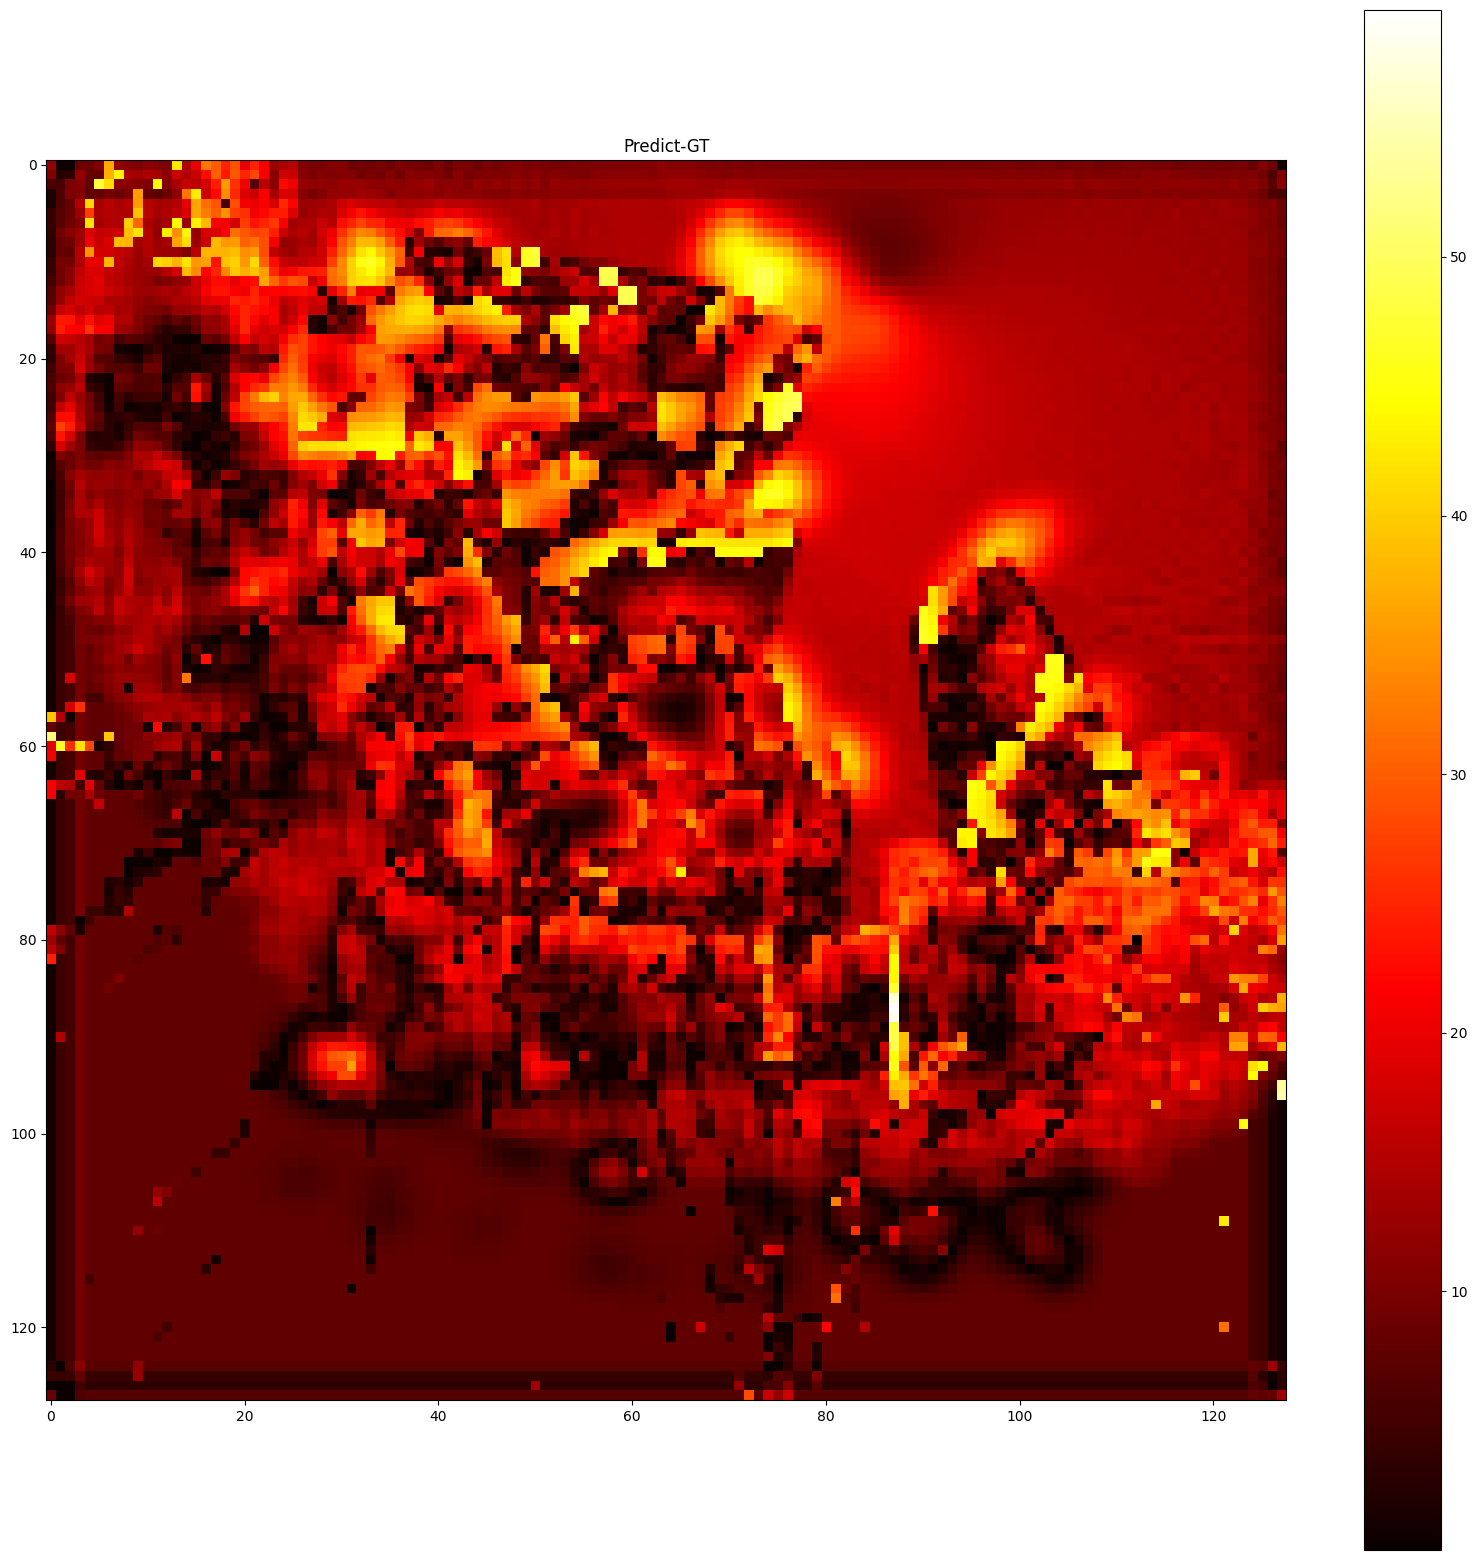

In [11]:
diff = abs(output_image - gold_image)
plt.figure(figsize=(20,20))
plt.subplot()
plt.imshow(diff, cmap='hot')
plt.title('Predict-GT')
plt.colorbar()
print(diff)